In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from collections import Counter
import math as Math


### Preprocessing Wine Quality Red dataset

In [2]:
filename=r"E:\Documents\University of Hildesheim\Machine learning lab\lab5\winequality-red.csv"
rwine_data = pd.read_csv(filename,delimiter=';')
rwine_data.head(3)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5


In [3]:
rwine_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
fixed acidity           1599 non-null float64
volatile acidity        1599 non-null float64
citric acid             1599 non-null float64
residual sugar          1599 non-null float64
chlorides               1599 non-null float64
free sulfur dioxide     1599 non-null float64
total sulfur dioxide    1599 non-null float64
density                 1599 non-null float64
pH                      1599 non-null float64
sulphates               1599 non-null float64
alcohol                 1599 non-null float64
quality                 1599 non-null int64
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


### Split data into a train and a test split (70% and 30% respectively)

In [4]:
Xdata_rwine = rwine_data.loc[:,rwine_data.columns!='quality']
Ydata_rwine = rwine_data[['quality']]
Xdata_rwine = (Xdata_rwine - Xdata_rwine.mean())/Xdata_rwine.std() #data normalized
x_train_rwine, x_test_rwine, y_train_rwine, y_test_rwine =train_test_split(Xdata_rwine, 
                                                                       Ydata_rwine,train_size=0.7, 
                                                                       test_size=0.3, 
                                                                       random_state=0,shuffle=True)

In [5]:
y_train_rwine=pd.DataFrame(y_train_rwine.values.reshape(-1,1))
y_test_rwine=pd.DataFrame(y_test_rwine.values.reshape(-1,1))
x_train_rwine=pd.DataFrame(x_train_rwine.values)
x_test_rwine=pd.DataFrame(x_test_rwine.values)

# Implement K-Nearest Neighbor (KNN)

### Calculating Euclidian distance

In [6]:
def EuclideanDistance(a,b):
    return np.sqrt(np.sum((a-b)**2))

### predicting the value of y 

In [17]:
def y_prediction(x,y,k):
    y_pred=[]
    for k,v in x:
        y_pred.append(y[k,0])
    return Counter(y_pred).most_common(1)[0][0]

### knn prediction

In [19]:
def predict_knn_reg(x,y,k,z):
    d=dict()
    for i in range(0,len(x)):
        d[i]=EuclideanDistance(z,x.iloc[i])
    d_new=sorted(d.items(),key=lambda kv:kv[1])
    c=d_new[:k]
    y_pred=y_prediction(c,y,k)
    return y_pred


# Implementing Kfold cross validation to find the optimal value of k using error minimization
### The function data_k_divide is used to divide the dataset according to the number of k fold
### The function k_data_train_test is used to get random test and train data in every kfold

In [10]:
def data_k_divide(data,k):
    k_size=Math.floor(len(data)/k)
    k_data=[] 
    c=0
    for i in range (0,k):
        data_set=pd.DataFrame(data.head(0))
        for j in range(i*k_size,(i*k_size)+k_size):
            data_set=data_set.append(data.iloc[j])
            c=c+1
        k_data.append(data_set)
        
    #adding datas which are remaining at the end of k division
    for j in range(c,len(data)):
        k_data[k-1]=k_data[k-1].append(data.iloc[j])
    return k_data

def k_data_train_test(x,y,k):
    k_folded_data=[]
    for i in range(0,k):
        x_test=x[i]
        y_test=y[i]
        x_train=pd.DataFrame()
        y_train=pd.DataFrame()
        for j in range(0,k):
            if i!=j:
                x_train=x_train.append(x[j])
                y_train=y_train.append(y[j])
        final_data=dict([('x',x_train),('y',y_train),('xt',x_test),('yt',y_test)])
        k_folded_data.append(final_data)
    return k_folded_data

def kfold(x_train,y_train,k):
    x_train_k=data_k_divide(x_train,k)
    y_train_k=data_k_divide(y_train,k)
    data=k_data_train_test(x_train_k,y_train_k,k)
    accuracy=[]
    for i in range(len(data)):
        y_pred=[]
        for j in range(0,len(data[i]['xt'])):
            y_pred.append(predict_knn_reg(data[i]['x'],data[i]['y'].values,k,data[i]['xt'].iloc[j].values))
        accuracy.append(classification_accuracy(data[i]['yt'],y_pred))
    return accuracy

### finding out the classification accuracy

In [33]:
def classification_accuracy(y,y_pred):
    y=pd.DataFrame(y).to_numpy()
    y_pred=np.asarray(y_pred)
    acc=np.mean(y == y_pred)
    return acc

In [20]:
ypred_v=[]
k=5
for j in range(0,len(x_test_rwine)):
    ypred_v.append(predict_knn_reg(x_train_rwine,y_train_rwine.values,k,x_test_rwine.iloc[j].values))
    


### The graph represents the comparison between predicted y and actual y when the value of k is 5

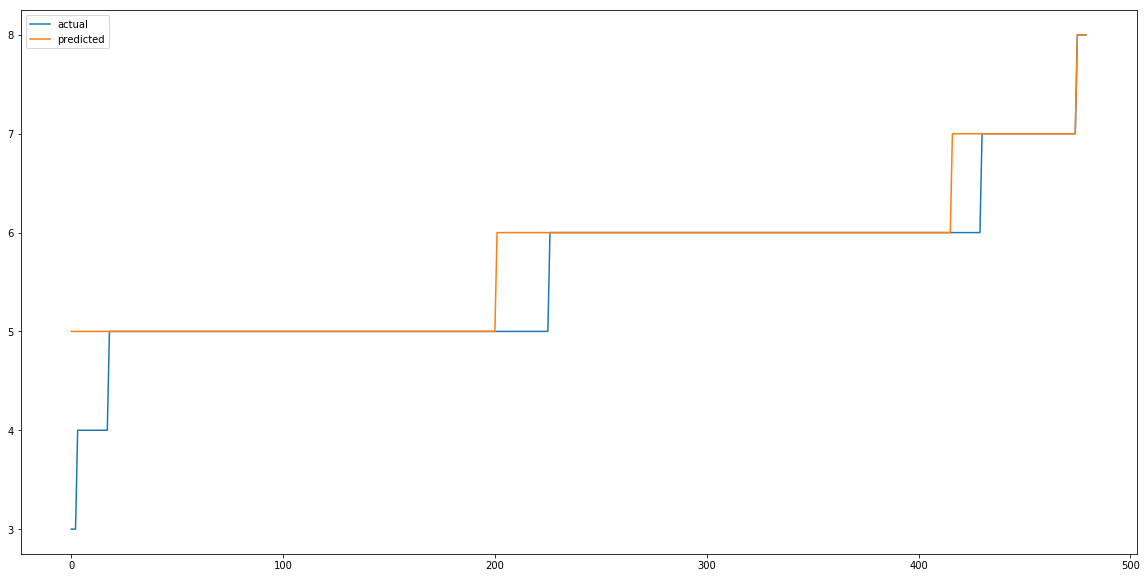

In [21]:
fig,axs=plt.subplots(1,1,figsize=(20,10))
axs.plot(sorted(y_test_rwine.values),label='actual')
axs.plot(sorted(ypred_v),label='predicted')
axs.legend()
plt.show()

In [26]:
print('Accuracy rate=',classification_accuracy(y_test_rwine.values,ypred_v))

Accuracy rate= 0.3834548611111111


### Calculating the accuracy with different values of k,k > 14 becomes more computionally complex so the limit is 15
### Then we got the best average accuracy of 0.3712 and the best k is 13

In [34]:
best_accuracy=0
best_k=0
accuracyall=[]
for i in range (2,15): #using k values between 2 to 15
    kr=kfold(x_train_rwine,y_train_rwine,i)
    if(len(accuracyall)==0 or np.average(kr)>best_accuracy):
        best_k=i
        best_accuracy=np.average(kr)
    accuracyall.append(np.average(kr))
    print('for value of k=',i,' ','best k=',best_k,'best_accuracy=',best_accuracy)
print('best average accuracy=',best_accuracy)
print('best k=',best_k)    

for value of k= 2   best k= 2 best_accuracy= 0.35454560611774993
for value of k= 3   best k= 3 best_accuracy= 0.35871265755761433
for value of k= 4   best k= 4 best_accuracy= 0.3597709960663218
for value of k= 5   best k= 5 best_accuracy= 0.3627328540413858
for value of k= 6   best k= 6 best_accuracy= 0.36397428060493064
for value of k= 7   best k= 7 best_accuracy= 0.36444537472014094
for value of k= 8   best k= 8 best_accuracy= 0.3670880078952534
for value of k= 9   best k= 9 best_accuracy= 0.36923532718033175
for value of k= 10   best k= 9 best_accuracy= 0.36923532718033175
for value of k= 11   best k= 11 best_accuracy= 0.3692360360062136
for value of k= 12   best k= 12 best_accuracy= 0.3697051490327639
for value of k= 13   best k= 13 best_accuracy= 0.37121208186263116
for value of k= 14   best k= 13 best_accuracy= 0.37121208186263116
best average accuracy= 0.37121208186263116
best k= 13



### After analyzing the graph we can see that with the increase of K accuracy increases because small value of k means that noise will have a higher influence on the result.

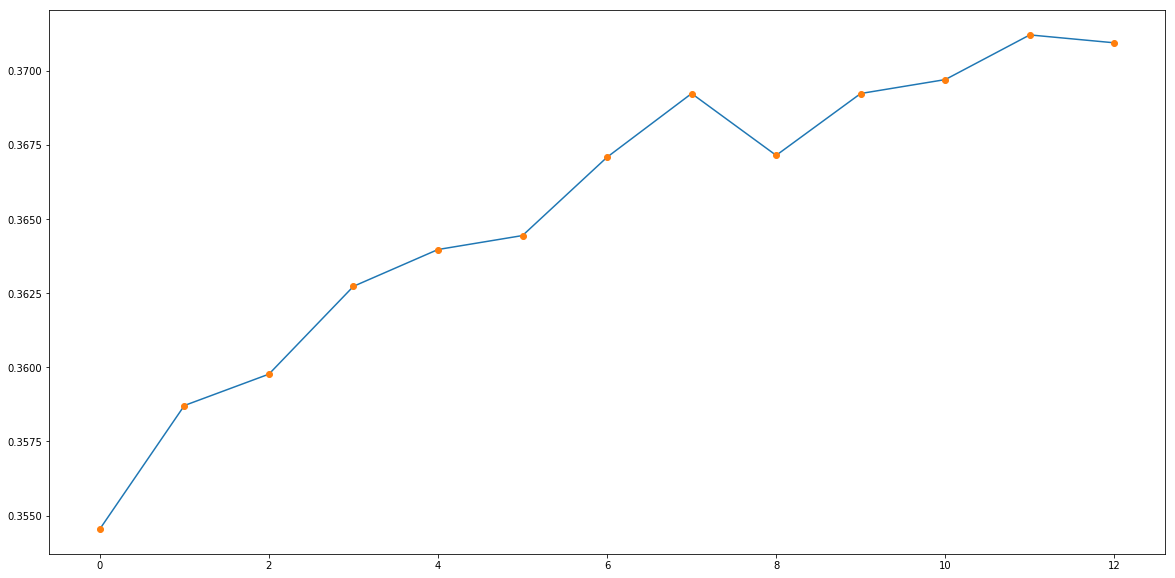

In [36]:
fig,axs=plt.subplots(1,1,figsize=(20,10))
axs.plot(np.arange(len(accuracyall)),accuracyall)
axs.plot(np.arange(len(accuracyall)),accuracyall,'o')
plt.show()